In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn import cluster, datasets, mixture
from sklearn import preprocessing

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [72]:
data = pd.read_csv("../preprocessed_data/preprocessed_train.csv")
data_2 = pd.read_csv("../data/bank-full.csv")

# PCA :v

In [3]:
var = []
for i in range (len(data.columns)):
    
    pca_ = PCA(n_components = i)
    pca_.fit(data)
    var.append(sum(pca_.explained_variance_ratio_))


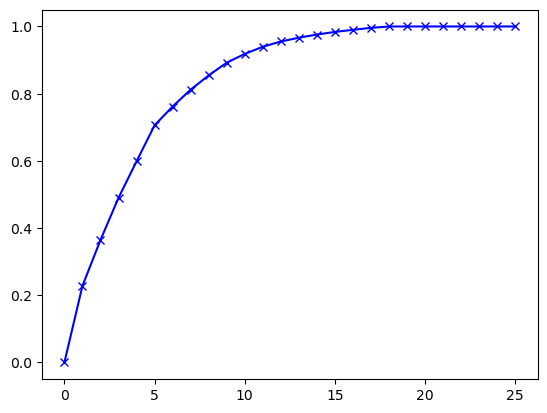

In [4]:
plt.plot(np.asarray([k for k in range(len(data.columns))]), np.asarray(var), 'bx-')
plt.ion()
plt.show()

Jak widzimy, dla n_comp = 10 mamy bardzo wystarczającą wariancje na poziomie ok 0.91

In [20]:
pca_ = PCA(n_components = 10)
XProcessed = pca_.fit_transform(data)

In [21]:
pd.DataFrame(XProcessed)

,0,1,2,3,4,5,6,7,8,9
0,-0.415115,-1.648015,0.294309,0.134983,0.871759,-0.296993,0.021696,-0.541323,0.512072,-0.228539
1,-1.036807,0.703967,-2.458887,0.295795,-1.223565,0.413511,-0.190186,-0.422945,0.170216,0.249498
2,-0.854215,1.024186,-0.244415,-0.705228,-0.948614,0.917496,-0.024937,-0.112782,0.247464,0.314134
3,3.456356,2.447811,0.190932,0.290966,0.833202,0.961873,-2.546373,0.415436,0.407641,0.755954
4,-0.424942,-1.296334,0.081775,-0.120281,0.922791,-0.283166,-0.008157,-0.591116,0.591232,-0.215723
...,...,...,...,...,...,...,...,...,...,...
22147,3.434372,0.068500,-0.434210,-0.189755,0.662591,-0.835600,0.358064,0.735183,0.534391,0.264897
22148,5.963685,0.132971,0.156723,-0.027542,0.070960,-0.958474,-4.266278,1.914737,0.798411,1.510175
22149,1.801975,-0.483395,0.058859,-0.462231,0.236082,-0.459879,-0.753285,0.696493,-0.811165,-0.142769
22150,-1.572992,0.322700,-4.153168,2.321748,-3.112987,0.711504,-0.137120,0.548970,-0.379225,0.668502


In [22]:
def metrics_plots(max_k=10):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(XProcessed)
        score.append(kmeans.score(XProcessed))
        score_kmeans_s.append(silhouette_score(XProcessed, kmeans.labels_, metric='euclidean'))
        score_kmeans_c.append(calinski_harabasz_score(XProcessed, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(XProcessed, predictions))

    list_scores = [score, score_kmeans_s, score_kmeans_c, score_kmeans_d] 
    list_title = ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 
    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        plt.plot(x_ticks, list_scores[i], 'bx-')
        plt.xlabel('k')
        plt.ylabel(list_title[i])
        plt.title('Optimal k')
        plt.show()

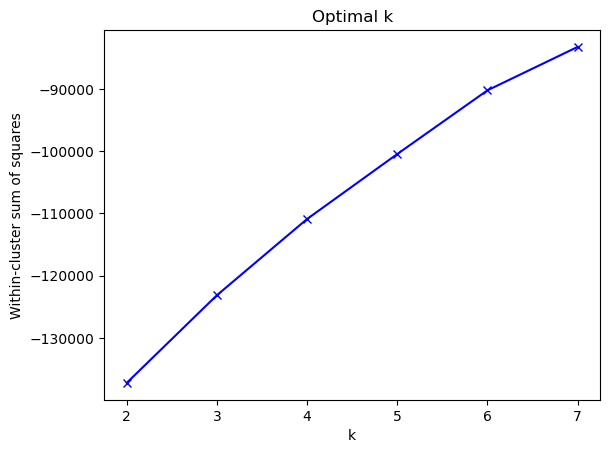

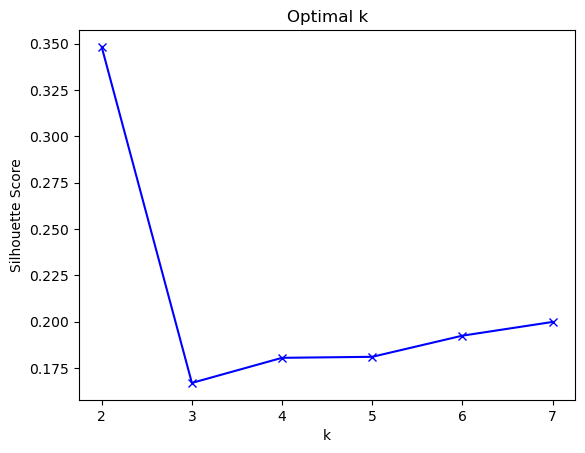

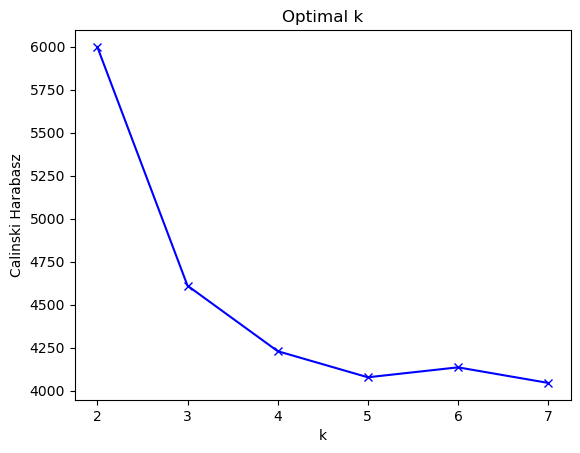

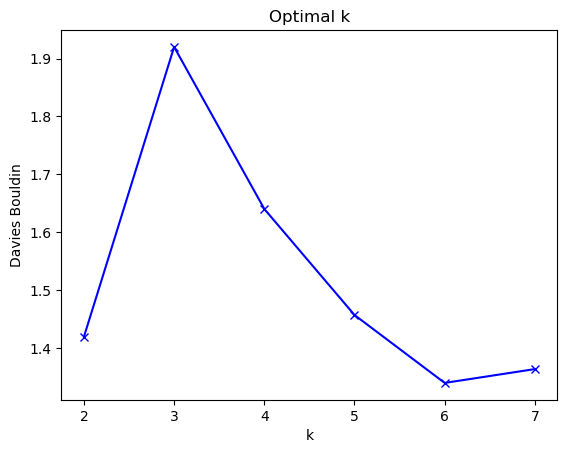

In [23]:
metrics_plots(max_k=8)

Przy zmienionym PCA dalej najlepsza liczba klastrów to 2 lub 3

# Clastering

### KMeans

In [30]:
kmeans = cluster.KMeans(n_clusters=2, random_state=0)
kmeans.fit(XProcessed)
y_pr = kmeans.predict(XProcessed)
y_pr = pd.DataFrame(y_pr)

In [31]:
kmeans = cluster.KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)
y = kmeans.predict(data)
y = pd.DataFrame(y)

In [33]:
len(y_pr.compare(y).iloc[:,0])

49

Między PCA a surowymi danymi widzimy różnice równą 0.2% na danych - pomijalnie mała

In [34]:
pca_3 = PCA(n_components = 3)
X3 = pca_.fit_transform(data)
kmeans = cluster.KMeans(n_clusters=2, random_state=0)
kmeans.fit(X3)
y_pr3 = kmeans.predict(X3)
y_pr3 = pd.DataFrame(y_pr3)

In [35]:
len(y_pr3.compare(y).iloc[:,0])

49

Co ciekawe, dla PCA = 3 różnica również wynosi 0.2% 

### GMM

In [38]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full')
kmeans.fit(XProcessed)
y_pr_G = kmeans.predict(XProcessed)
y_pr_G = pd.DataFrame(y_pr_G)

In [39]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full')
kmeans.fit(data)
y_G = kmeans.predict(data)
y_G = pd.DataFrame(y_G)

In [41]:
len(y_pr_G.compare(y_G).iloc[:,0])

49

In [42]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full')
kmeans.fit(X3)
y_pr_G3 = kmeans.predict(X3)
y_pr_G3 = pd.DataFrame(y_pr_G3)

In [43]:
len(y_pr_G3.compare(y).iloc[:,0])

49

# Inter

Weźmiemy klastry od PCA i nałożymy na dane 

In [76]:
data_cl = data.join(y_pr_G)
data_cl.columns = [                'age',             'balance',            'duration',
                  'campaign',               'pdays',            'previous',
                     'month',                 'job',             'default',
                      'loan',             'housing',   'is_first_campaign',
         'education_primary', 'education_secondary',  'education_tertiary',
         'education_unknown',    'marital_divorced',     'marital_married',
            'marital_single',    'contact_cellular',   'contact_telephone',
           'contact_unknown',    'poutcome_failure',      'poutcome_other',
          'poutcome_success',    'poutcome_unknown',                     'cluster']
data_cl

,age,balance,duration,campaign,pdays,previous,month,job,default,loan,...,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,cluster
0,-1.412641,-0.430443,-0.345535,-0.656488,-0.411125,-0.335885,-0.178162,0.001409,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.855078,-0.462731,-0.912556,2.577611,-0.411125,-0.335885,-0.262245,-0.279402,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,1.422008,-0.278968,0.379918,0.556299,-0.411125,-0.335885,-0.287045,-0.337086,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,1.610984,2.131931,-0.362212,-0.656488,4.240569,0.274344,0.321082,-0.087433,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,-0.940199,-0.454831,-0.574845,-0.656488,-0.411125,-0.335885,-0.076088,-0.494406,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22147,0.288148,-0.024105,-0.737446,-0.656488,2.251228,2.105032,0.650124,0.197445,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
22148,0.382637,0.240720,0.233994,-0.656488,7.556139,0.274344,1.798401,0.197445,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
22149,-0.373270,-0.488835,-0.099548,-0.656488,1.617806,0.274344,-0.178162,0.197445,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
22150,0.004683,-0.324651,-0.583183,5.811710,-0.411125,-0.335885,-0.287045,-0.494406,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


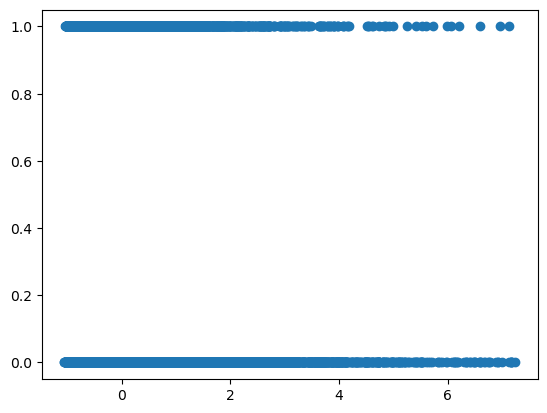

In [77]:
a = data_cl.iloc[:,:-1].columns[2]
cl = data_cl.iloc[:,-1]
plt.scatter(data_cl[a],cl)
plt.show()

In [78]:
cl = data_cl.iloc[:,-1]
for column in data_cl.iloc[:,:-1].columns:

    df.pivot(columns = 'age', values = 'cluster').plot.hist()
    plt.show()
    
    

KeyError: 'age'

<Axes: xlabel='Count', ylabel='age'>

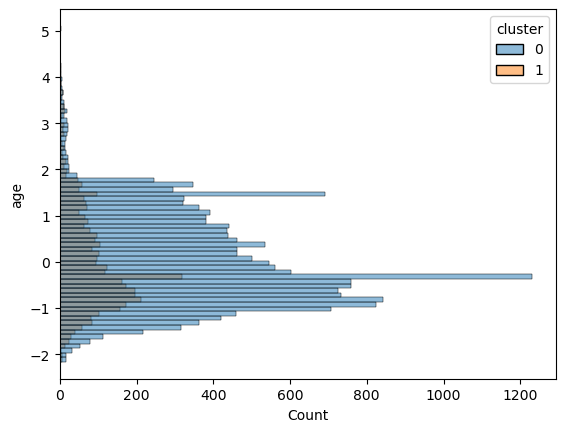

In [79]:
sns.histplot(y='age', data=data_cl, hue='cluster', legend=True)